# Part I - Prosper Loan Dataset Exploration
## by Ibukun Ajayi

## Introduction

This project is split up into two sections.

In the first section, we will do exploratory data analysis on a Prosper Loan dataset. To study the dataset's variables and comprehend the data's structure, anomalies, patterns, and relationships, we will utilize Python data science and data visualization modules. This section's study is organized, progressing from basic univariate interactions through multivariate correlations.

In the second section, we will provide our key results from our exploration to others through an explanatory analysis. To that effect, we will design a slide show with polished, understandable graphics to convey our findings.



## Preliminary Wrangling

This exploratory analysis delves into a dataset of 113,937 loans, each having 81 factors such as loan amount, borrower rate (or interest rate), loan status, borrower APR, borrower income, and many more.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# ignore deprecation warnings - https://stackoverflow.com/questions/879173/how-to-ignore-deprecation-warnings-in-python

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import warnings
warnings.simplefilter("ignore")

In [3]:
# expand maximun number of columns and row dosplayed

pd.set_option('display.max_column',None) # while viewing data, do not collapse columns
pd.set_option('display.max_rows',None) # in order to present all rows in the output

In [4]:
# load in the dataset into a pandas dataframe
# print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [5]:
# high-level overview of data shape and composition

print(loans.shape)
print(loans.dtypes)
print(loans.head())

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [6]:
# descriptive statistics for numeric variables
print(loans.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Most variables are numeric in nature, but the variables CreditGrade, LoanStatus, ProsperRating(Alpha), ListingCategory, Occupation, EmploymentStatus, IncomeRange, and IsBorrowerHomeowner are categorical variables.

> The dataset features can be split into three main categories:

1. Borrowers data
2. Loan data
3. Credit Risk metrics

### What is/are the main feature(s) of interest in your dataset?

> I will have a look at factors that predicts the borrower’s APR as well as the effect of the the borrowers' occupation and employment status on the loan amount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the following to have effects on the APR: LoanStatus, EmploymentStatus, StatedMonthlyIncome, ProsperScore, BorrowerRate, DebtToIncomeRatio, LoanOriginalAmount, and 'ProsperRating (Alpha)'. I also suspect the following borrowers'features will have to some extent an effect on the loan performance:

- IncomeRange - The income range of the borrower at the time the listing was created.
- DebToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. 
- ProsperRating (Alpha) - The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
- LenderYield - The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- Term - The length of the loan expressed in months
- CreditGrade - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
- ListingCategory - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

## Univariate Exploration

> In this section, i will investigate distributions of individual variables. once i find any unusual points or outliers, i will take a deeper look to clean things up and prepare to look at relationships between various variables.





> Using 81 variables for the analysis is not realistic, we will select 16 variables of interest. The main loan and some borrower's indicators were selected for further analysis.

In [7]:
# First, i will create a sub dataset as new dataframe consisting of all variables of interest

cols = ['LoanOriginalAmount', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 
        'LenderYield', 'CreditGrade','ListingCategory (numeric)','IncomeRange',
        'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerState', 'Occupation', 
        'EmploymentStatus', 'DebtToIncomeRatio', 'StatedMonthlyIncome']

sub_loans = loans[cols]

# save the created dataset into a csv format
sub_loans.to_csv('sub_loans.csv', index=False)

# check the dataset composition
sub_loans.head()

LoanOriginalAmount  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0                9425    36  Completed      0.16516        0.1580   
1               10000    36    Current      0.12016        0.0920   
2                3001    36  Completed      0.28269        0.2750   
3               10000    36    Current      0.12528        0.0974   
4               15000    36    Current      0.24614        0.2085   

   LenderYield CreditGrade  ListingCategory (numeric)     IncomeRange  \
0       0.1380           C                          0  $25,000-49,999   
1       0.0820         NaN                          2  $50,000-74,999   
2       0.2400          HR                          0   Not displayed   
3       0.0874         NaN                         16  $25,000-49,999   
4       0.1985         NaN                          2       $100,000+   

  ProsperRating (Alpha)  ProsperScore BorrowerState     Occupation  \
0                   NaN           NaN            CO          Other   
1                     A           7.0            CO   Professional   
2                   NaN           NaN            GA          Other   
3                     A           9.0            GA  Skilled Labor   
4                     D           4.0            MN      Executive   

  EmploymentStatus  DebtToIncomeRatio  StatedMonthlyIncome  
0    Self-employed               0.17          3083.333333  
1         Employed               0.18          6125.000000  
2    Not available               0.06          2083.333333  
3         Employed               0.15          2875.000000  
4         Employed               0.26          9583.333333

In [8]:
# It is obvious that ProsperRating (Alpha) and CreditGrade belong together 
# because they are mutually separated by age of loans (before and after 2009). 
# the metrics for the rating are the same
# Hence, we are going to combine these two variables

# fill NaN with empty strings
sub_loans['ProsperRating (Alpha)'].fillna("", inplace = True)
sub_loans['CreditGrade'].fillna("", inplace = True)

# Then combine both ratings
sub_loans['Prosper_Rating'] = sub_loans['ProsperRating (Alpha)'] + sub_loans['CreditGrade']

# check that any erroneous data has not been introduced from the addition of two 'A' grades to form a 'AA' grade
#Is the number of A and AA ratings the same before and after combining the columns?
(sub_loans['Prosper_Rating'] == 'A').sum() == (sub_loans.CreditGrade == 'A').sum() + (sub_loans['ProsperRating (Alpha)'] == 'A').sum() and \
(sub_loans['Prosper_Rating'] == 'AA').sum() == (sub_loans.CreditGrade == 'AA').sum() + (sub_loans['ProsperRating (Alpha)'] == 'AA').sum()


True

In [9]:
sub_loans.head()

LoanOriginalAmount  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0                9425    36  Completed      0.16516        0.1580   
1               10000    36    Current      0.12016        0.0920   
2                3001    36  Completed      0.28269        0.2750   
3               10000    36    Current      0.12528        0.0974   
4               15000    36    Current      0.24614        0.2085   

   LenderYield CreditGrade  ListingCategory (numeric)     IncomeRange  \
0       0.1380           C                          0  $25,000-49,999   
1       0.0820                                      2  $50,000-74,999   
2       0.2400          HR                          0   Not displayed   
3       0.0874                                     16  $25,000-49,999   
4       0.1985                                      2       $100,000+   

  ProsperRating (Alpha)  ProsperScore BorrowerState     Occupation  \
0                                 NaN            CO          Other   
1                     A           7.0            CO   Professional   
2                                 NaN            GA          Other   
3                     A           9.0            GA  Skilled Labor   
4                     D           4.0            MN      Executive   

  EmploymentStatus  DebtToIncomeRatio  StatedMonthlyIncome Prosper_Rating  
0    Self-employed               0.17          3083.333333              C  
1         Employed               0.18          6125.000000              A  
2    Not available               0.06          2083.333333             HR  
3         Employed               0.15          2875.000000              A  
4         Employed               0.26          9583.333333              D

In [10]:
sub_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   LenderYield                113937 non-null  float64
 6   CreditGrade                113937 non-null  object 
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   IncomeRange                113937 non-null  object 
 9   ProsperRating (Alpha)      113937 non-null  object 
 10  ProsperScore               84853 non-null   float64
 11  BorrowerState              108422 non-null  object 
 12  Occupation                 110349 non-null  object 
 13  EmploymentStatus           11

In [11]:
sub_loans.describe()

LoanOriginalAmount           Term    BorrowerAPR   BorrowerRate  \
count        113937.00000  113937.000000  113912.000000  113937.000000   
mean           8337.01385      40.830248       0.218828       0.192764   
std            6245.80058      10.436212       0.080364       0.074818   
min            1000.00000      12.000000       0.006530       0.000000   
25%            4000.00000      36.000000       0.156290       0.134000   
50%            6500.00000      36.000000       0.209760       0.184000   
75%           12000.00000      36.000000       0.283810       0.250000   
max           35000.00000      60.000000       0.512290       0.497500   

         LenderYield  ListingCategory (numeric)  ProsperScore  \
count  113937.000000              113937.000000  84853.000000   
mean        0.182701                   2.774209      5.950067   
std         0.074516                   3.996797      2.376501   
min        -0.010000                   0.000000      1.000000   
25%         0.124200                   1.000000      4.000000   
50%         0.173000                   1.000000      6.000000   
75%         0.240000                   3.000000      8.000000   
max         0.492500                  20.000000     11.000000   

       DebtToIncomeRatio  StatedMonthlyIncome  
count      105383.000000         1.139370e+05  
mean            0.275947         5.608026e+03  
std             0.551759         7.478497e+03  
min             0.000000         0.000000e+00  
25%             0.140000         3.200333e+03  
50%             0.220000         4.666667e+03  
75%             0.320000         6.825000e+03  
max            10.010000         1.750003e+06

I'll start by looking at the distribution of the main variable of interest: Borrower APR, loan amount, loan status, and interest rate.

### What is the distribution of the Loan Original Amount?

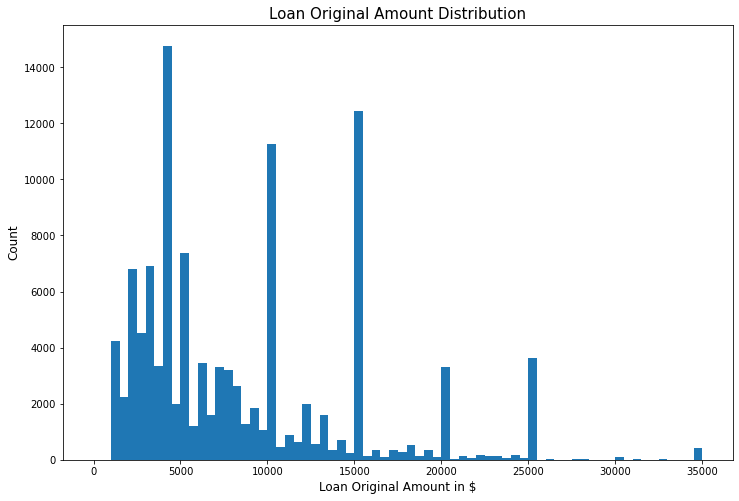

In [12]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, sub_loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = sub_loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution', fontsize=15)
plt.xlabel('Loan Original Amount in $', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show();

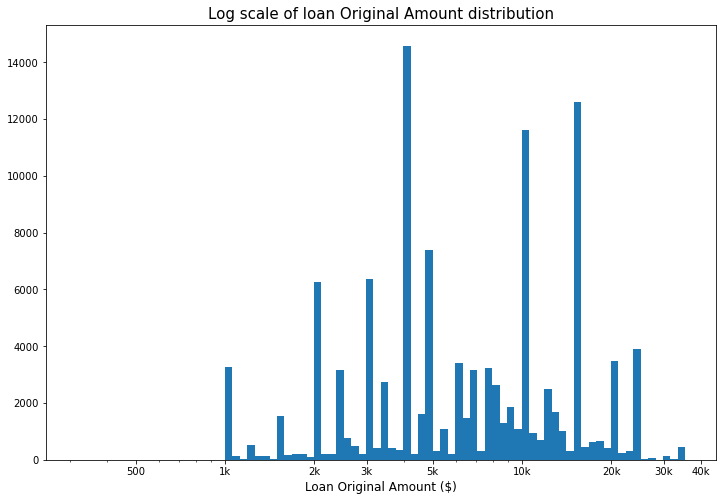

In [13]:
# There appears to be a long tail in the distribution and it is rightly skewed, so i'll put it on a log scale instead

log_binsize = 0.025
bins = 10 ** np.arange(2.5, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = sub_loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Log scale of loan Original Amount distribution', fontsize=15)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 4e4], [500, '1k', '2k', '3k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('Loan Original Amount ($)', fontsize=12)
plt.show()

The distribution of Loan Amount is long-tailed, with many loans on the low end and few on the high end when shown on a log scale, with its first peak between 3000 and 5000 and a the second between 10000 and 20000.

### What is the distribution of the borrower APR?

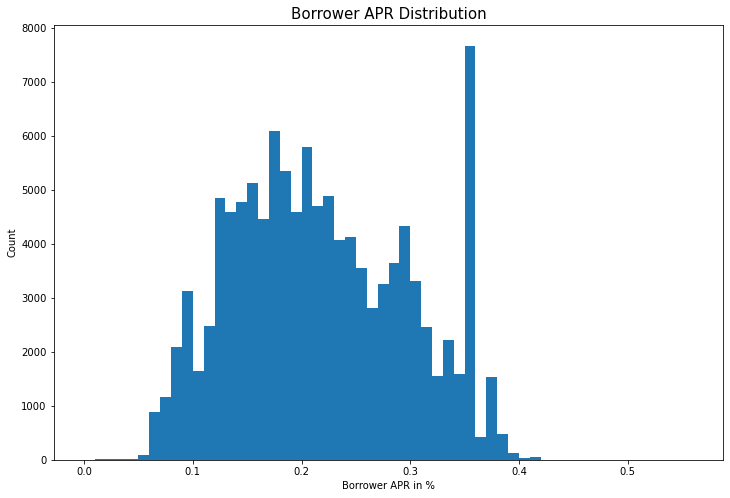

In [14]:
bins = np.arange(0, sub_loans['BorrowerAPR'].max()+0.05, 0.01)

plt.figure(figsize=[12, 8])
plt.hist(data = sub_loans, x = 'BorrowerAPR', bins = bins)
plt.title('Borrower APR Distribution', fontsize=15)
plt.xlabel('Borrower APR in %', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show();

The distribution of the borrower APR has a peaak a little below 0.1, a second peak around 0.2 and a steep jump in frequency right after 0.1. It has a third peak between 0.3 and 0.4. The distribution is multimodal and a very few loans has an APR >0.43.

We would like to investigate APR >0.43 further for any interesting contributor or effect

In [15]:
sub_loans[sub_loans['BorrowerAPR']> 0.43]

LoanOriginalAmount  Term  LoanStatus  BorrowerAPR  BorrowerRate  \
18326                 3000    36   Defaulted      0.45857        0.4500   
22195                 1789    36  Chargedoff      0.46201        0.4500   
36018                 1500    36   Completed      0.51229        0.4975   
56761                 3000    36   Defaulted      0.50633        0.4975   
82043                 3000    36   Defaulted      0.48873        0.4800   
103973                2800    36   Defaulted      0.45857        0.4500   

        LenderYield CreditGrade  ListingCategory (numeric)    IncomeRange  \
18326        0.4325          HR                          0  Not displayed   
22195        0.4325          HR                          0  Not displayed   
36018        0.4925          HR                          0  Not displayed   
56761        0.4800          HR                          0  Not displayed   
82043        0.4750          HR                          0  Not displayed   
103973       0.4325          HR                          0  Not displayed   

       ProsperRating (Alpha)  ProsperScore BorrowerState Occupation  \
18326                                  NaN           NaN        NaN   
22195                                  NaN           NaN        NaN   
36018                                  NaN           NaN        NaN   
56761                                  NaN           NaN        NaN   
82043                                  NaN           NaN        NaN   
103973                                 NaN           NaN        NaN   

       EmploymentStatus  DebtToIncomeRatio  StatedMonthlyIncome Prosper_Rating  
18326               NaN            0.10252         10000.000000             HR  
22195               NaN            0.35430          2916.666667             HR  
36018               NaN            0.02852          2838.000000             HR  
56761               NaN            0.03909             0.000000             HR  
82043               NaN            0.10021          1583.333333             HR  
103973              NaN            0.19413          3750.000000             HR

This holds no interesting detail. There are six listings of borrowers with APR >0.43. These borrowers have small loan mounth with no income range, occupation, prosper score, and employment status.

### What is the distribution of the borrower rate (interest rate)?

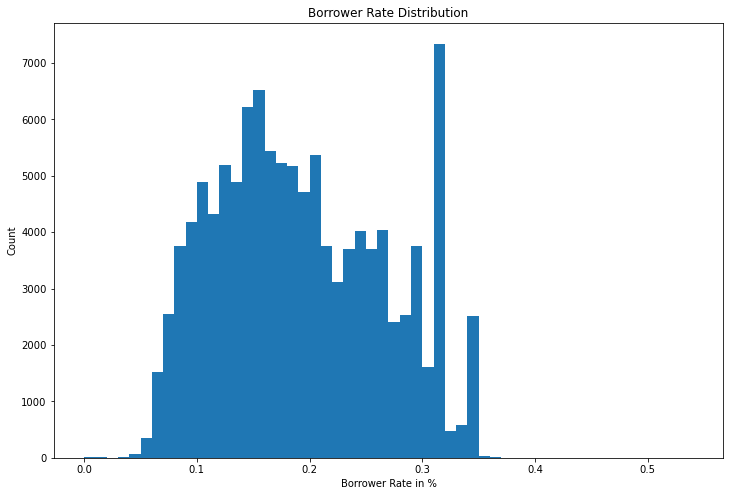

In [16]:
bins = np.arange(0, sub_loans['BorrowerRate'].max()+0.05, 0.01)

plt.figure(figsize=[12, 8])
plt.hist(data = sub_loans, x = 'BorrowerRate', bins = bins)
plt.title('Borrower Rate Distribution', fontsize=12)
plt.xlabel('Borrower Rate in %', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show();

The borrower Rate distribution is bimodal in nature. It has its first peak between 0.1 and 0.2 which is the minor mode, the second peak (major mode) just right after 0.3.

### What is the distribution of the loan status?

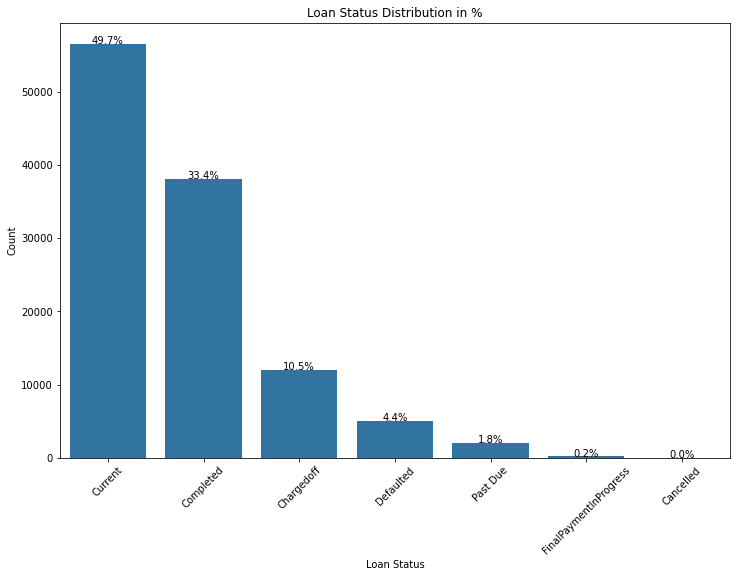

In [17]:
# Aggregate all 'Past Due' status into a singsle column since it only differs by days of maturity 


sub_loans['LoanStatus'] = sub_loans['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')


colors = sns.color_palette()[0]

# Order the categorical variable 
loan_stat_order=sub_loans.LoanStatus.value_counts().index

# Print the proportion below the bars
total_loans=sub_loans['LoanStatus'].value_counts().sum()
stat_count=sub_loans['LoanStatus'].value_counts()
stat_order=stat_count.index

colors = sns.color_palette()[0]

plt.figure(figsize=(12,8))

sns.countplot(data=sub_loans, x='LoanStatus', color=colors, order=stat_order);

plt.title('Loan Status Distribution in %')
plt.xlabel('Loan Status')
plt.ylabel('Count');


# get the tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair 

for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    loan_count = stat_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*loan_count/total_loans) 
    # print the annotation just below the top of the bar
    plt.text(loc, loan_count+2, pct_string, ha = 'center', color = 'black')


Source: https://stackoverflow.com/questions/52080991/how-to-display-percentage-above-grouped-bar-chart


In the case of the loan status, about 75% of all Prosper loans are current (good profiles). Approximately 50% of them are being serviced by Prosper's borrowers and 33% are paid off (completed). Roughly 11% of Prosper's loans, however, were charged-off or defaulted and 1.8% are past due.

I'll now move on to the other variables in the dataset: Listing category, term, BorrowerState, Employment Status and Prosper_Rating.

### What is the most common duration for which Loans were taken ?

36    87778
60    24545
12     1614
Name: Term, dtype: int64


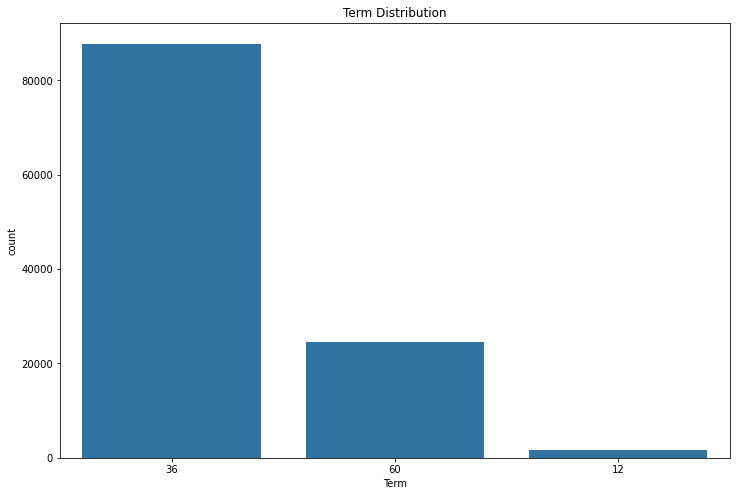

In [18]:
print(sub_loans['Term'].value_counts());

# we take a look at the Loan term distribution
colors = sns.color_palette()[0]

# Order the categorical variable 
Term_order=sub_loans.Term.value_counts().index


plt.figure(figsize=[12, 8])


sns.countplot(data = sub_loans, x = 'Term', order = Term_order, color = colors);
plt.title('Term Distribution')
plt.xlabel('Term');

We observe that over 80,000 borrowers' loan were approved on 36 months loan term, 24545 on 60 months and less than 2,000 on 12 months

### Which states have the most and least number of borrowers ?

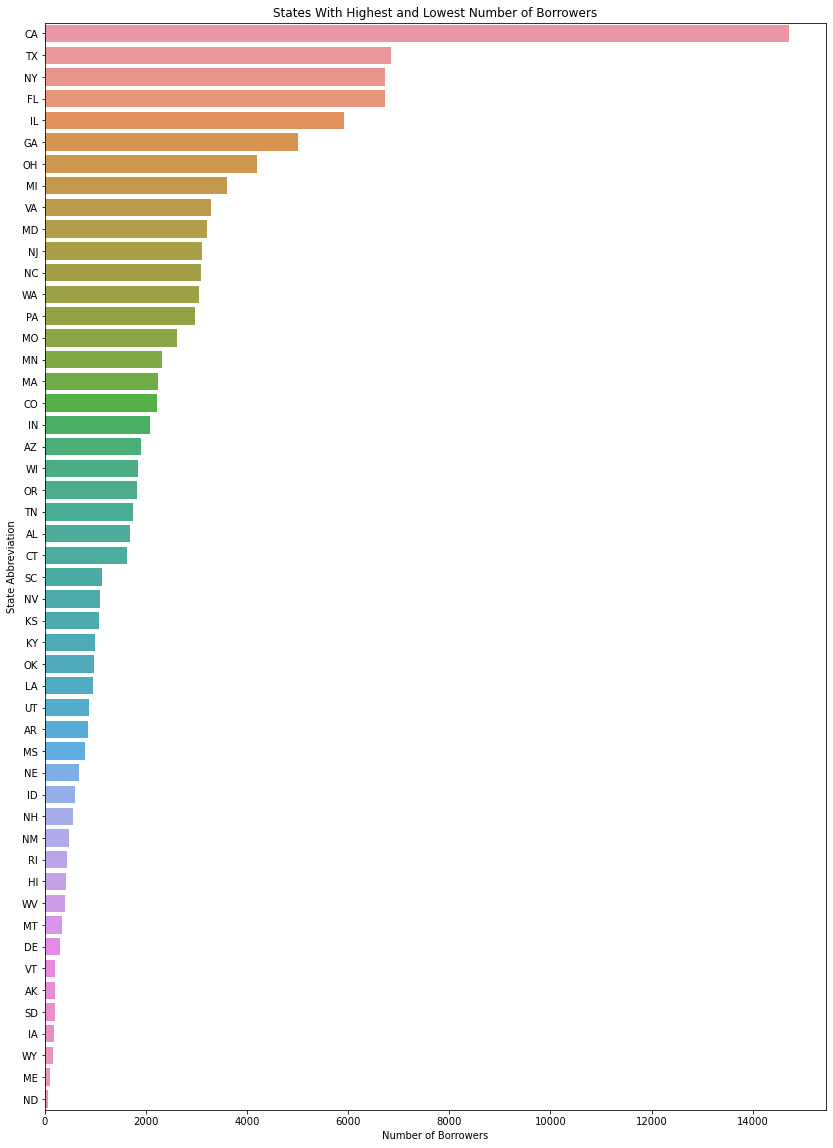

In [19]:
# Observed that DC was listed as a state 
# DC is not a state but a city in Maryland (MD)
# Hence replace DC with MD

sub_loans['BorrowerState']=sub_loans['BorrowerState'].replace(['DC'],['MD'])


state_list = sub_loans['BorrowerState'].value_counts().index.tolist()
state_count = sub_loans['BorrowerState'].value_counts().values.tolist()


f,(ax) = plt.subplots(sharey=False, sharex=False, figsize=(14, 20))

sns.barplot(x=state_count, y=state_list)
ax.set_title('States With Highest and Lowest Number of Borrowers')
ax.set_xlabel('Number of Borrowers')
ax.set_ylabel('State Abbreviation')
plt.show()

The top 3 states with the highest number of borrowers are California, Texas, and New York while North Dakota, Maine, and Wyoming are the states with the least number of borrower. There could be a trend here, questions such as what are the factors that makes the loan attractive in a particular location over the other, why is the population in a particular location more than the others arises from this distribution. But due to limited data, we might not be able to dig too deep into this particular analysis.

### How many of the borrowers are employed ?
### What is the distribution of the risk rating assigned to borrowers?
### What are the occupation of the employed borrowers?

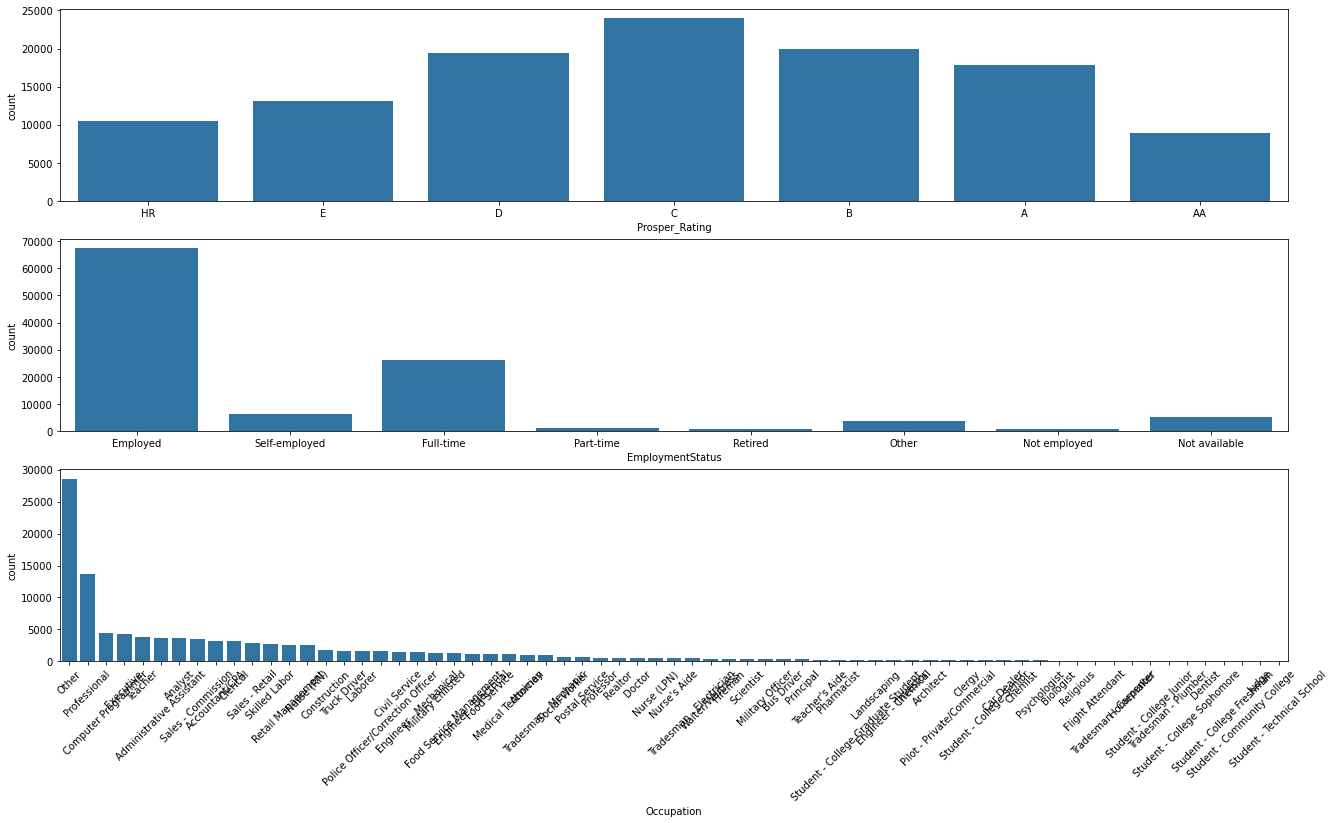

In [20]:
# convert employment Status, occupation, and Prosper Rating into ordered categorical types

var_dict = {'EmploymentStatus': ['Employed','Self-employed','Full-time','Part-time','Retired','Other',
                                 'Not employed', 'Not available'],
                    'Prosper_Rating': ['HR','E','D','C','B','A','AA']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var_dict[var])
    sub_loans[var] = sub_loans[var].astype(ordered_var)
    

job=sub_loans.Occupation.value_counts().index

    
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [22,12])

colors = sns.color_palette()[0]
sns.countplot(data = sub_loans, x = 'Prosper_Rating', color = colors, ax = ax[0]);
sns.countplot(data = sub_loans, x = 'EmploymentStatus', color = colors, ax = ax[1]);
sns.countplot(data=sub_loans, x='Occupation', order=job, color=colors, ax = ax[2]);
plt.xticks(rotation=45);

plt.show()

The Prosper Rating is expressed as a letter grade that indicates the expected level of risk associated with a loan listing. Each letter grade corresponds to an estimated average annualized loss rate range where AA is lowest risk, lowest return and HR is highest risk, highest return. As you can check the plot above, it is seen that lower risk has the least population where it is rated as “C”. The variables populated for listings before 2009 and after 2009  shows that the majority population has a risk rating profile of  C (moderate) and AA (best rating) has the least population. 

The majority of borrowers are working, which is understandable given that it would be difficult to obtain a loan without a job while interestingly, the category "others" has the highest population, followed by professional and then computer programmer. Although, it is difficult to ascertain what exactly others means for the occupation. This then leads to the investigation on what the loan was applied towards.

### What was the most common reason for taking a loan ?

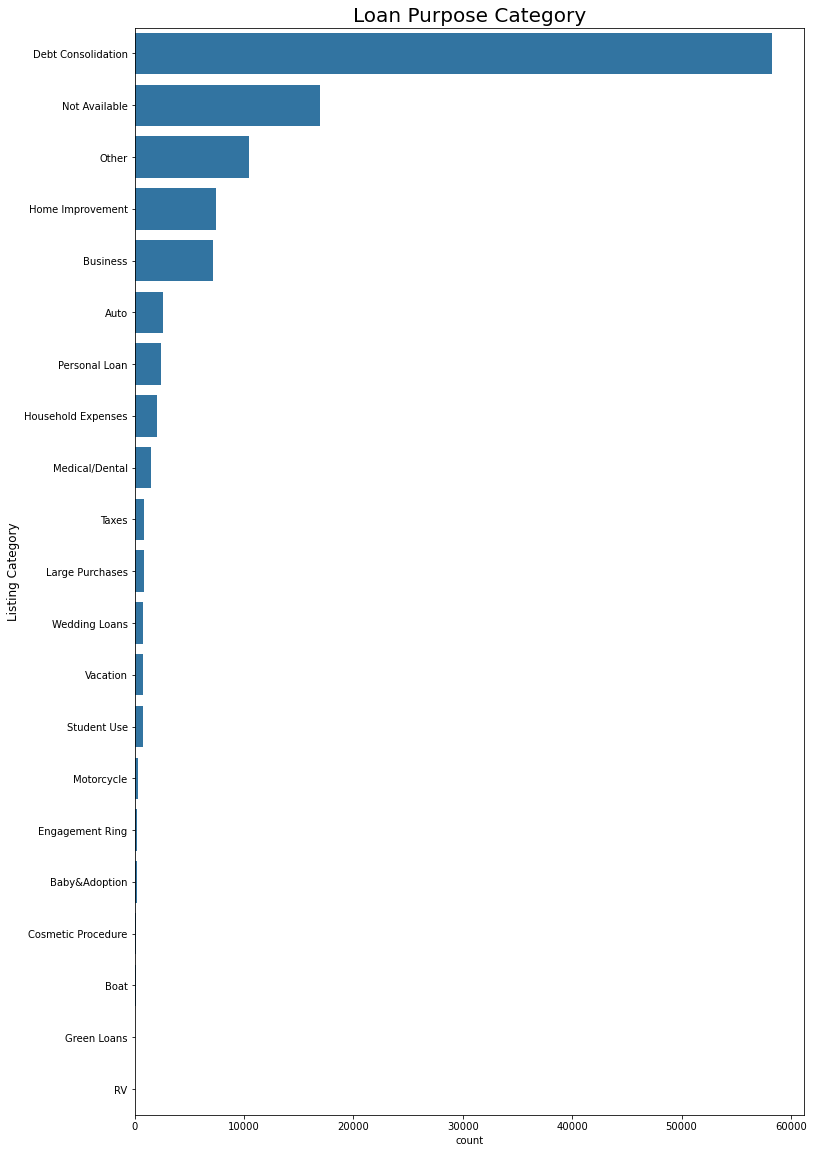

In [21]:
# Create dictionary for the categorical variable

loan_cat_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

sub_loans['ListingCategory'] = sub_loans['ListingCategory (numeric)'].map(loan_cat_dict)
sub_loans.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

# Convert variable to a categorical order
cat_dict = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 
             'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 
             'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans',
             'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle',
              'RV', 'Taxes', 'Vacation', 'Wedding Loans']

cat_order = pd.api.types.CategoricalDtype(ordered = True, categories = cat_dict)

sub_loans['ListingCategory'] = sub_loans['ListingCategory'].astype(cat_order)

# Plotting for ListingCategory
colors = sns.color_palette()[0]

plt.figure(figsize=[12, 20])

cat_order=sub_loans['ListingCategory'].value_counts().index

sns.countplot(data=sub_loans, y='ListingCategory', order=cat_order, color=colors)
plt.title('Loan Purpose Category', fontsize=20)
plt.ylabel('Listing Category', fontsize=12);

Surprisingly, majority of the borrowers applied for the loan for debt consolidation. This means that loan was used for debt refinancing probably because the individuals are addressing consumer debt. It is worthy to note that this type of loan can hurt the credit score of such individuals. Another risk to the individual is that they might wind up with more debt than they start with. Although, it is a sensible financial strategy if the borrowers are tackling credit card debt. However, numerous loans were included in the Not Available and Other categories, making it difficult to tell which was the most prevalent reason for taking out a loan.

However, this leads us to the major income bucket of the listings based on Prosper Loan Data

### what are the major income bucket of the listings

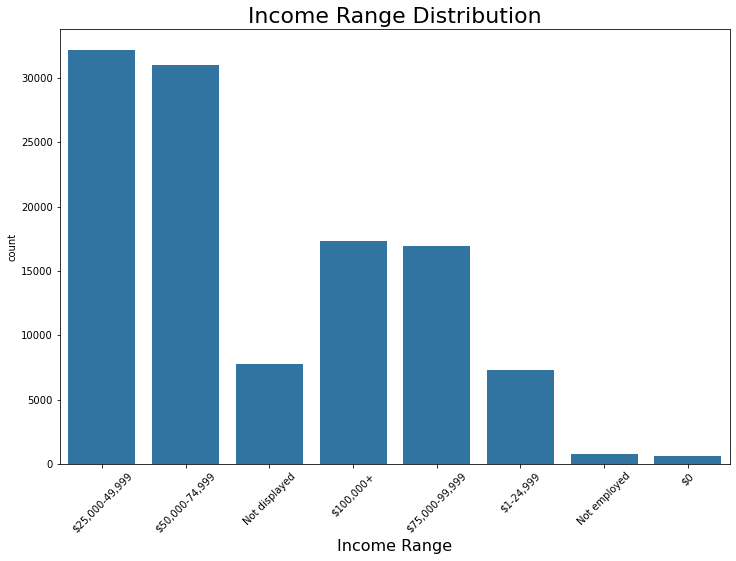

In [22]:
base_color = sns.color_palette()[0]

plt.figure(figsize=(12,8))
sns.countplot(x='IncomeRange',data=sub_loans,color=base_color)
plt.xticks(rotation=45)
plt.xlabel('Income Range', fontsize=16)
plt.title('Income Range Distribution', fontsize=22);

According to the plot, the majority of the population earns >USD50,000 followed by USD50,000 to USD74,999. Furthermore, other higher income earners have a dense population.

Another factor that determines the lenders position to give loans to the listed borrowers is the debt to income ratio. hence, we'll take a look at the distribution of the debt to income ratio of the borrowers before we close this section.

### What is the distribution of Debt to Income (DTI) Ratio

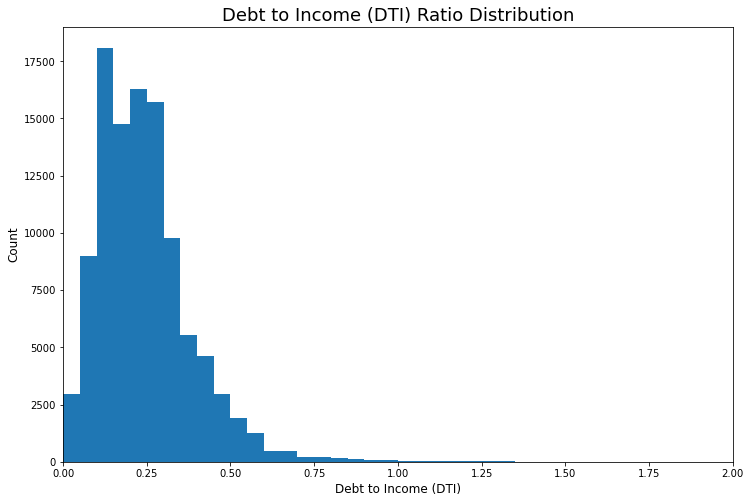

In [23]:
# Plotting DebtToIncomeRation Distribution
binsize=0.05
bins = np.arange(0, sub_loans['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = sub_loans, x = 'DebtToIncomeRatio', bins = bins)
plt.title('Debt to Income (DTI) Ratio Distribution', fontsize=18)
plt.xlabel('Debt to Income (DTI)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlim(0,2)
plt.show();

The plot above shows that most borrowers DTI falls betweet 20% and 35%. Lenders want a debt-to-income ratio of no more than 36%, a low DTI ratio indicates sufficient income relative to debt servicing, and it makes a borrower more attractive.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I made a new credit score variable. This was accomplished by combining two existing rating criteria that were separated by the loan origination date. 
> The loan initial amount is varied, with the most often issued amounts being 4k, 15k, and 10k. Also, the distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4. We also can observe that Lender Yield is normally distributed, with most values falling between 0.1 and 0.2 and a rise at 0.3.
> Given the Loan Original Amount's skewed distribution, it was converted on a logrithmic scale to provide a normal distribution for simplicity of graphic translation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Created a new column for the Listing Category using a dictionary created fro the categorical variable.
> I looked at a handful of right-skewed variables on a logarithmic scale to determine where the majority of the data points are.
> Observed that DC (Washington was listed as a state), i replaced it with Maryland which is the supposed state the district belongs to.
> Aggregated all 'Past Due' status into a singsle column since it only differs by maturity date



## Bivariate Exploration

> In this section, i'm investigating relationships between pairs of variables that i have in my data. Making sure the variables that i cover here have been introduced in some fashion in the previous section (univariate exploration).

### What is the relationship between all the numeric variables of the dataset

In [24]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR','BorrowerRate','LenderYield', 
                'ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome']
categoric_vars = ['ListingCategory', 'Occupation', 'LoanStatus', 'Prosper_Rating', 
                  'EmploymentStatus', 'BorrowerState', 'Term']

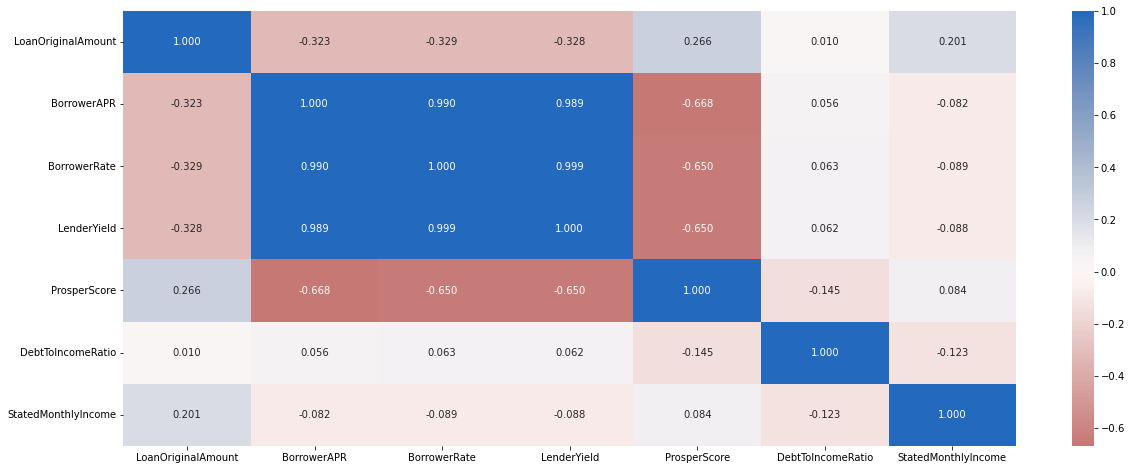

In [25]:
# correlation plot
plt.figure(figsize = [20, 8])
sns.heatmap(sub_loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

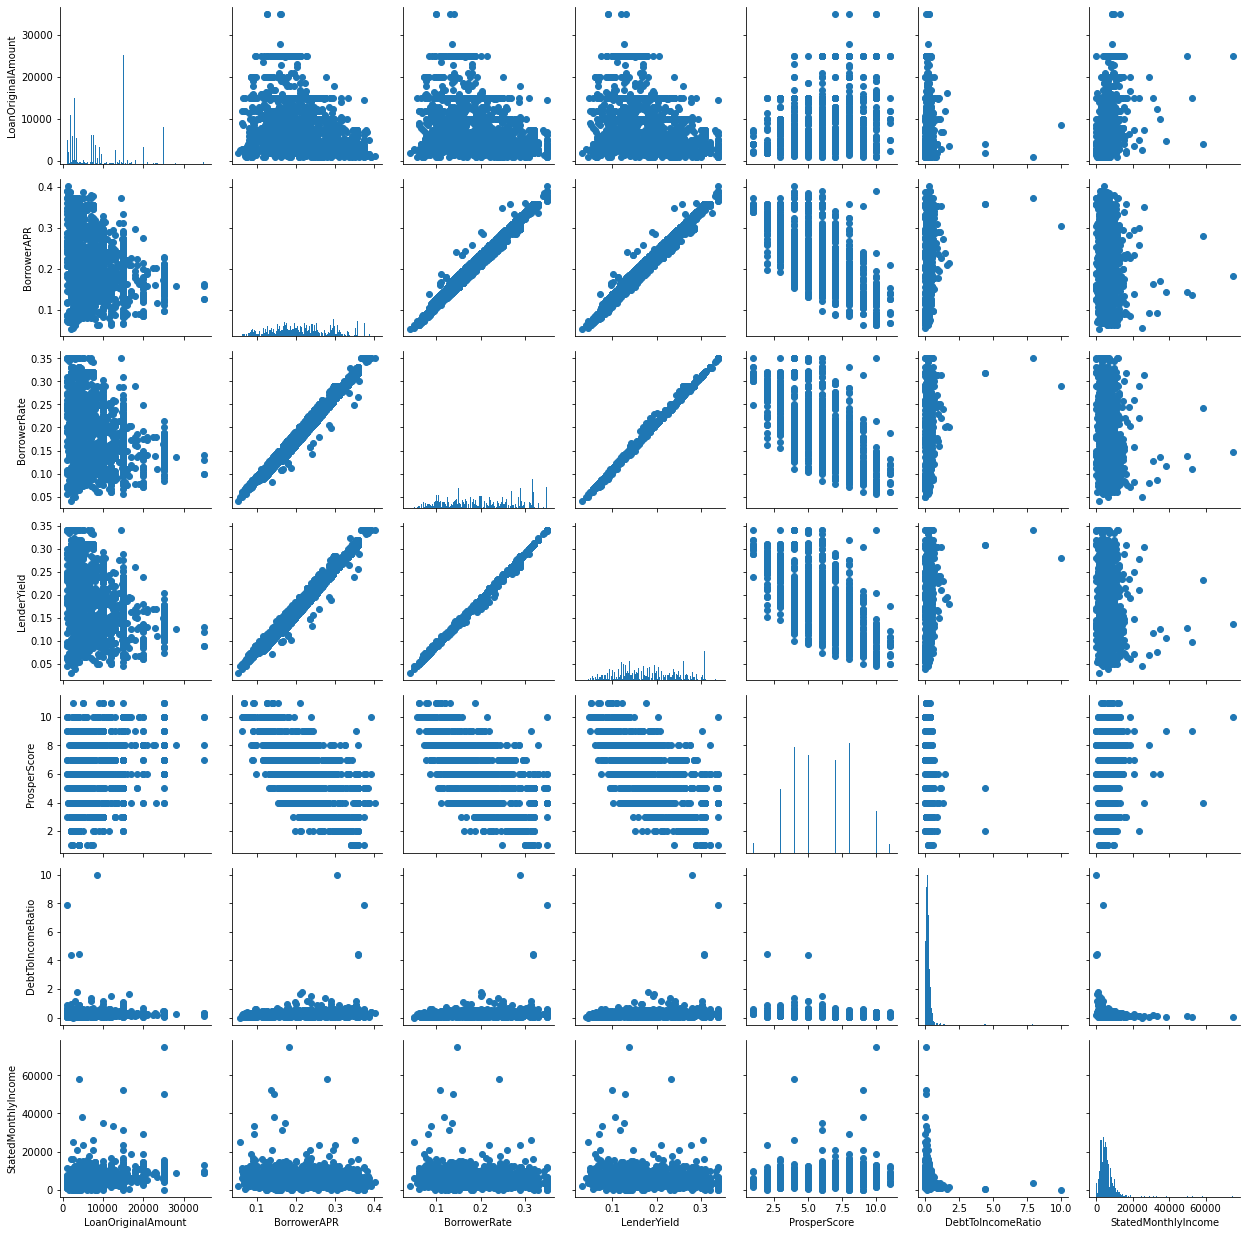

In [26]:
# plot matrix: sample 1500 prosper loan data so that plots are clearer and they render faster
samples = np.random.choice(sub_loans.shape[0], 1500, replace = False)
loans_samp = sub_loans.loc[samples,:]

g = sns.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 200);
g.map_offdiag(plt.scatter);

As expected, the 'BorrowerAPR', 'LenderYield', and 'BorrowerRate' dimensions are highly correlated with one another. Also, loan amount has a weak positive correlation with stated monthly income and debt to income ratio. This makes sense because the larger the income, the greater the loan a borrower may obtain.

Furthermore, the borrower APR and the original loan amount were negatively correlated, which means that the larger the loan, the lower the APR.

It makes sense that the borrowerAPR, rate, and lenderyield is negatively correlated to prosper score because borrowers with lower score are more likely to pay higher APR and will definitely been given the loan at a higher rate.

### What effect does the borrowerAPR has on the ProsperScore?

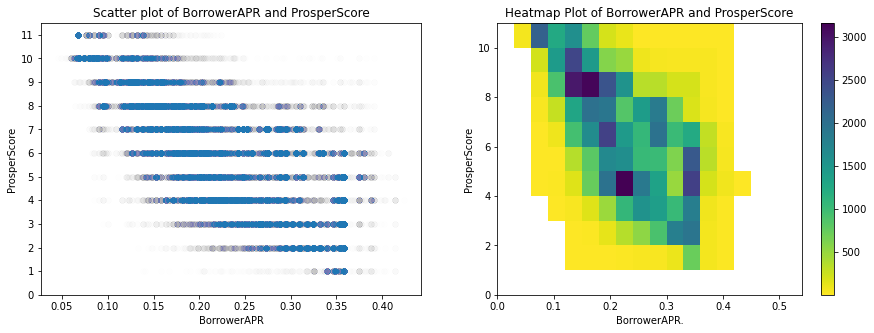

In [27]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = sub_loans, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter plot of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, sub_loans['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, sub_loans['ProsperScore'].max()+1, 1)
plt.hist2d(data = sub_loans, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('Heatmap Plot of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR.')
plt.ylabel('ProsperScore');

This seems logical because persons with better ratings are more dependable and hence have lower BorrowerAPR.

Following that, we create a scatter and heat plot for the Loan Original Amount and Borrower Rate.

### How does the loan amount relates with the borrower rate?

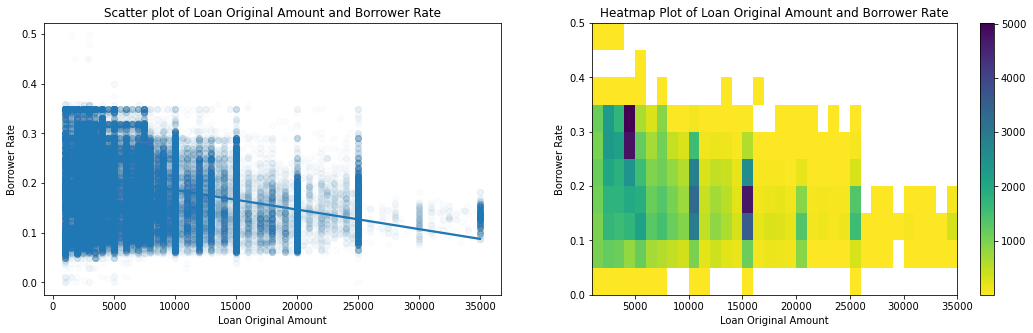

In [28]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sns.regplot(data=sub_loans,x="LoanOriginalAmount",y="BorrowerRate",scatter_kws={"alpha":0.02});
plt.xlabel("Loan Original Amount");
plt.ylabel("Borrower Rate");
plt.title("Scatter plot of Loan Original Amount and Borrower Rate");

plt.subplot(1, 2, 2)
x_bin = np.arange(sub_loans['LoanOriginalAmount'].min(), sub_loans['LoanOriginalAmount'].max()+1000,1000)
y_bin = np.arange(sub_loans['BorrowerRate'].min(), sub_loans['BorrowerRate'].max()+0.05, 0.05)
plt.hist2d(data = sub_loans, x = 'LoanOriginalAmount', y = 'BorrowerRate', bins = [x_bin, y_bin], 
           cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Loan Original Amount");
plt.ylabel("Borrower Rate");
plt.title("Heatmap Plot of Loan Original Amount and Borrower Rate");

The plots shows that the higher the loan amount, the less interest rate the borrower is charged.

We take a look at the relationship between the loan amount and the listing category

### Does Higher Income Lead to Higher Prosper Scores ?

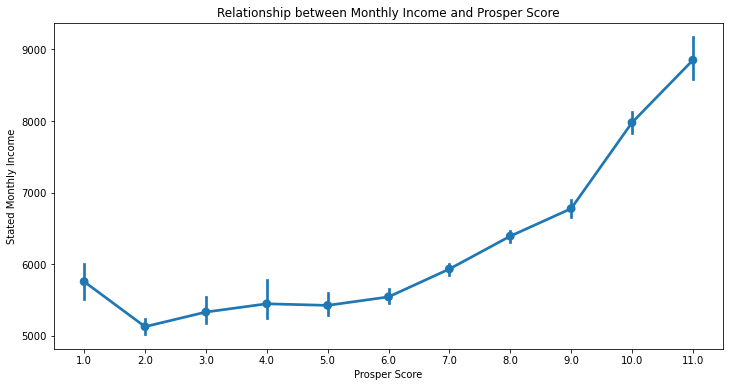

In [29]:
fig = plt.figure(figsize=(12,6))

sns.pointplot(y='StatedMonthlyIncome', x='ProsperScore', data=sub_loans); 

plt.title('Relationship between Monthly Income and Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Stated Monthly Income')
plt.show()

There is a significant positive correlation between monthly income and Prosper score. The more your monthly income, the higher your Prosper score.

### How does the Loan Amount fluctuate amongst Loan Categories?

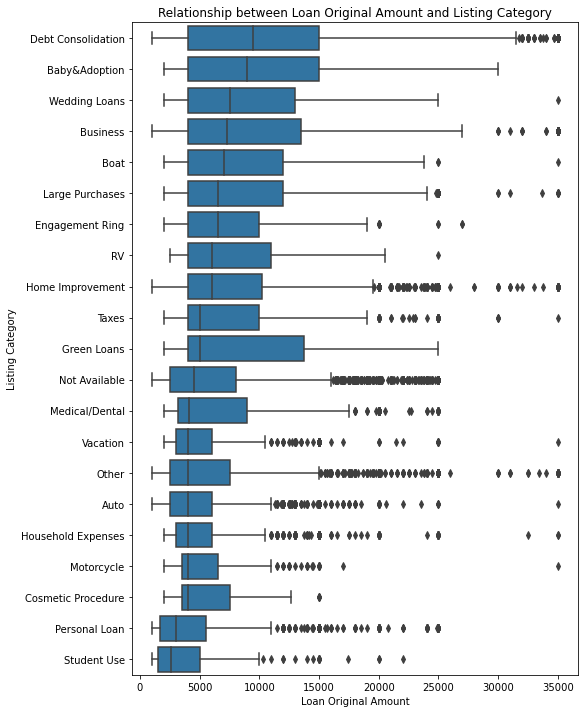

In [30]:
listing_order = sub_loans.groupby(by=["ListingCategory"])["LoanOriginalAmount"].median().sort_values().iloc[::-1].index

plt.figure(figsize=[8,12])
color=sns.color_palette()[0]

sns.boxplot(data=sub_loans,y="ListingCategory",x="LoanOriginalAmount",color=color,order=listing_order);
plt.xlabel("Loan Original Amount");
plt.ylabel("Listing Category");
plt.title("Relationship between Loan Original Amount and Listing Category");

Debt consolidation has the hightest median while student use has the least.

Next, I want to examine how the numeric variables particularly, the borrower APR correlate to the categorical variables.

### Does the Occupation affect the Amount of Loan Taken ?

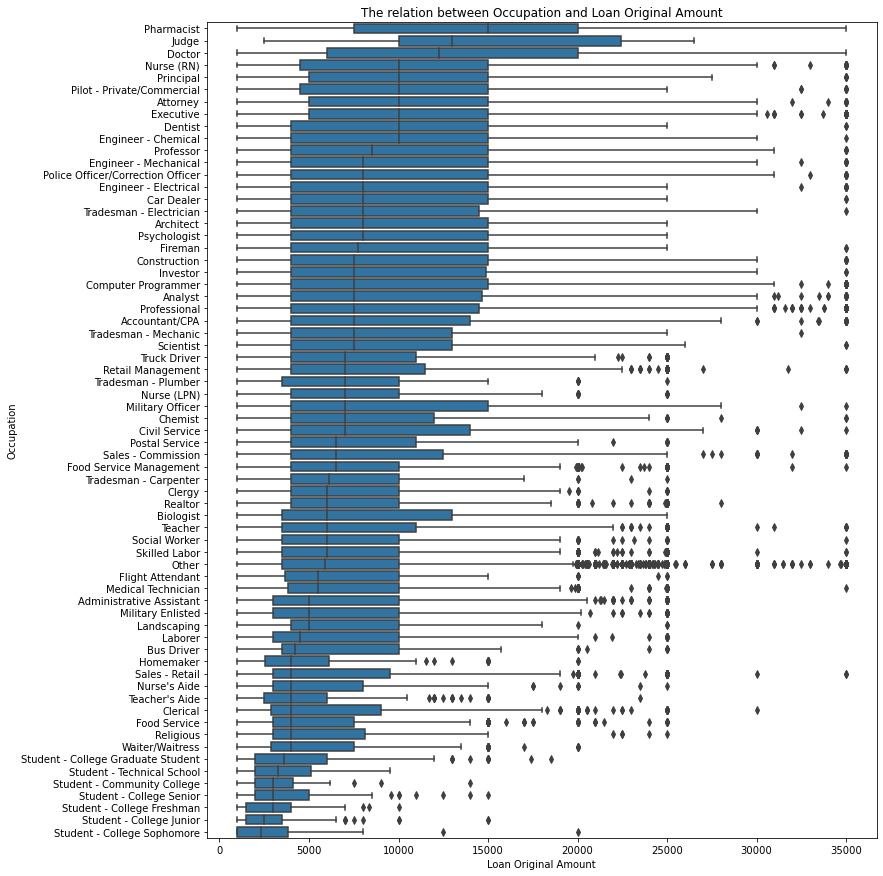

In [31]:
plt.figure(figsize=[12,15])
color=sns.color_palette()[0]

occupation_order = sub_loans.groupby(by=["Occupation"])["LoanOriginalAmount"].median().sort_values().iloc[::-1].index

sns.boxplot(data=sub_loans, y="Occupation", x="LoanOriginalAmount",color=color, order=occupation_order)

# setting labeles and title
plt.ylabel("Occupation");
plt.xlabel("Loan Original Amount");
plt.title("The relation between Occupation and Loan Original Amount");

The pharmacist have the highest loan amount and college student sophomore have the least.

### How does some numeric variables and categoric variables relates?

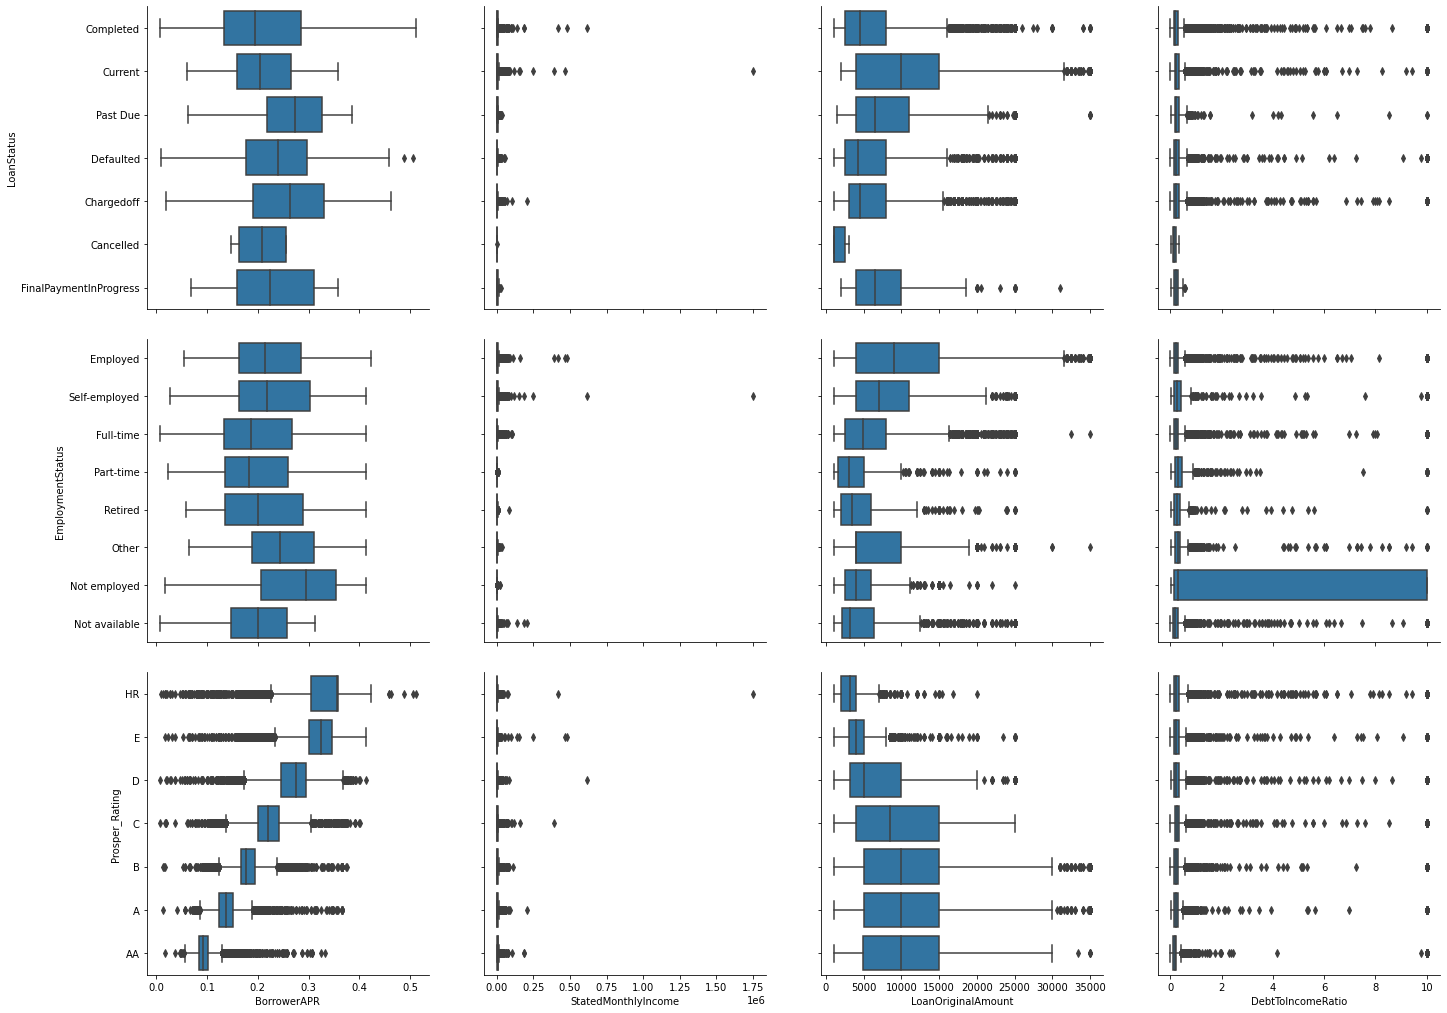

In [32]:
base_color = sns.color_palette()[0]
g = sns.PairGrid(data = sub_loans, x_vars =['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio'],
               y_vars = ['LoanStatus', 'EmploymentStatus', 'Prosper_Rating'])
g.map(sns.boxplot, color = base_color)
g.fig.set_size_inches(20,15); # To get a better look with figure(s) bigger 

The unemployed borrowers seems to have the highest average APR while 'full-time,' 'part-time,' and'retired' have some of the lowest. But then the question is how did the unemployed get their loan approved? The information presented in these dataset may not be able to investigate this.

This will lead us to explore the relationship between the categorical variables and the loan status.

### What is the relationship between loan status and some categoric variable

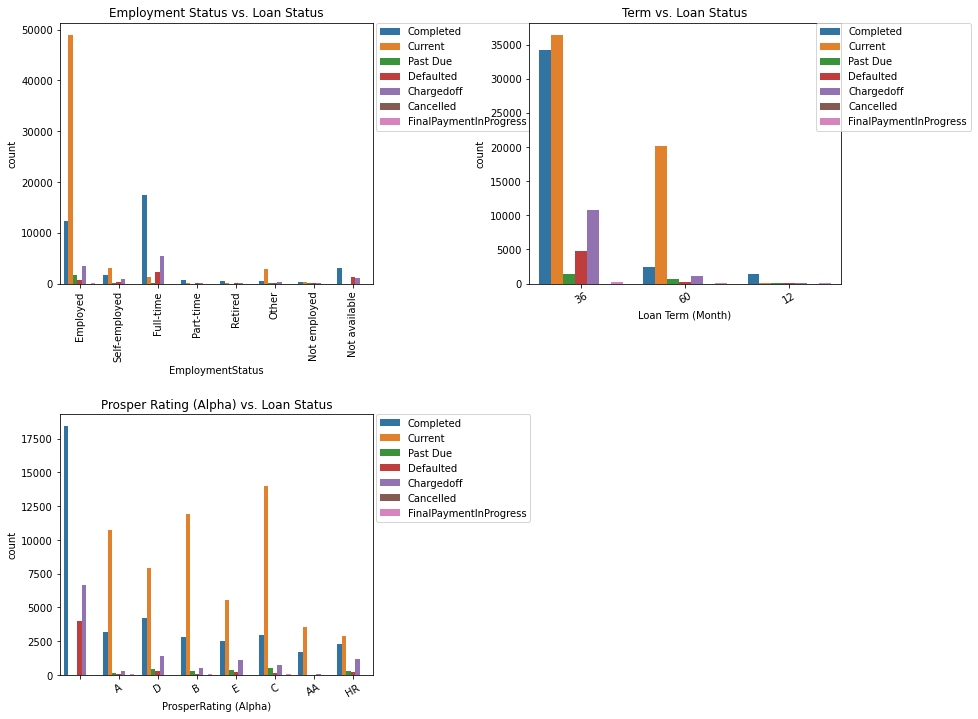

In [33]:
from matplotlib import rcParams

# Start by comparing 'LoanStatus' variable to the other categorical variables
rcParams['figure.figsize'] = 14, 12


#subplot 1
plt.subplot(2,2,1)
sns.countplot(data = sub_loans, x = 'EmploymentStatus', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Employment Status vs. Loan Status');

#subplot 2
Term_order=sub_loans.Term.value_counts().index

plt.subplot(2,2,2)
sns.countplot(data = sub_loans, x = 'Term', hue = 'LoanStatus', order=Term_order)
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(0.92, 1),
           borderaxespad=0)
plt.xlabel('Loan Term (Month)')
plt.title('Term vs. Loan Status');

#subplot 3
plt.subplot(2,2,3)
sns.countplot(data = sub_loans, x = 'ProsperRating (Alpha)', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Prosper Rating (Alpha) vs. Loan Status');

plt.subplots_adjust(wspace=0.50, 
                    hspace=0.5)

Starting at the top left, there isn't much information to be gleaned from 'part-time,' 'not employed,' and 'retired,' but we may assume that practically all current loans are granted to persons who are deemed working. Those that work 'full-time' have the most finished debts.

Moving to the right plot, we can observe that the vast bulk of the loans have 36-month durations. The 36-month loan appears to have the most loans of any sort. Nevertheless, we can see that there are a lot of existing loans with a period of 60 months.

Finally, we can observe that existing loans account for a percentage of each rating and have the largest count. We may also see that the bulk of current loans are held by persons with credit ratings ranging from C, B, and A.

### Does the Employment Status affect the Amount of Loan Taken ?

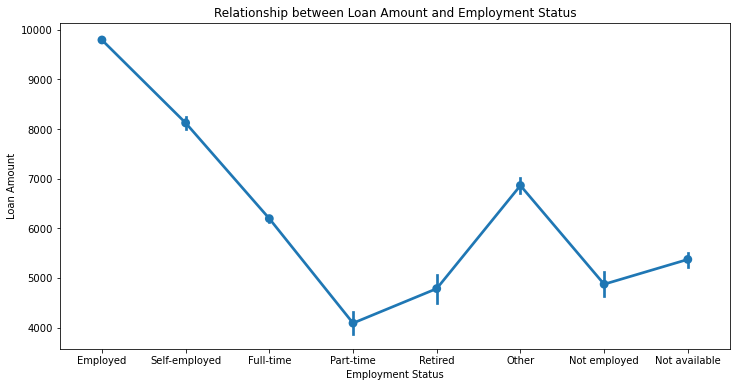

In [34]:
fig = plt.figure(figsize=(12,6))

sns.pointplot(y='LoanOriginalAmount', x='EmploymentStatus', data=sub_loans); 

plt.title('Relationship between Loan Amount and Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Loan Amount')
plt.show()

Borrowers who are employed have a greater loan amount when compared to borrowers from other occupational groups. Borrowers who are Retired and Not Employed, on the other hand, have taken out smaller loans when compared to other occupational groups.

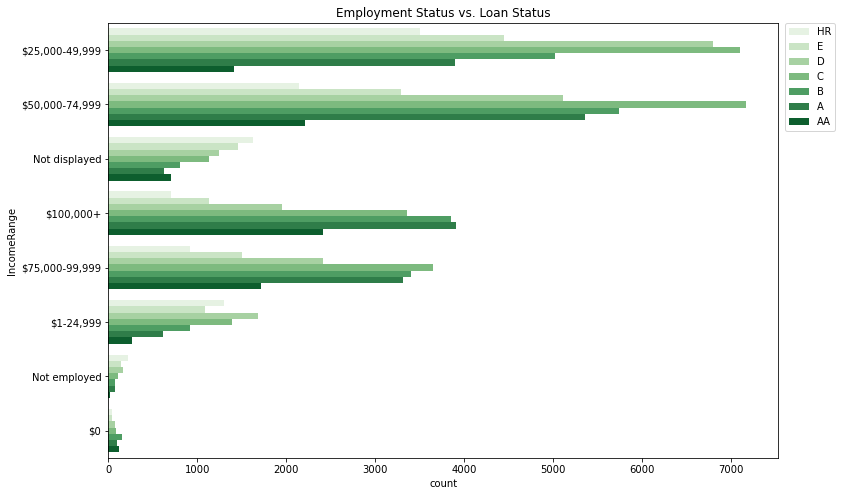

In [36]:
# Plotting a clustered bar chart to see the distribution of the prosper rating along the income range 
# As a qualitative vs quantitative exploration

plt.figure(figsize = [12,8])

ax = sns.countplot(data = sub_loans, y = 'IncomeRange', hue = 'Prosper_Rating', palette = 'Greens')

ax.legend(title = 'Borrower Credit Rating')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('Employment Status vs. Loan Status');

We can observe from this clustered bar chart that greater salaries link to a higher credit rating, qualifying the borrower for the best (lowest) interest rates.

A salary of USD 75k or more does not guarantee the greatest credit scores. I'm interested to discover whether additional elements play a significant influence in deciding one's credit rating in the multivariate study.

In contrast, it appears that there are a large number of "AA" loans in the USD 0 income area compared to the USD 1-25k income range. To earn the greatest credit rating without any revenue, I think you must have other major assets or a fantastic history with the company!

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower's APR had a surprisely high amount of correlation with the lender's yield. What this means is that as the APR increases the yield also increases. Also, there is a positive relationship between the APR and the prosper score. Taking a look at the credit ratings and income ranges, fit was discovered that there exists a trend of high income equating to better credit ratings, however there are some interesting cases where a high number of borrowers with no income qualified for the highest credit ratings. Also, we saw that borrowers with incomes of greater than USD 75k can still be considered "High Risk" borrowers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Expected relationship was found btween the borrowerAPR and borrowerRate. A small negative correlation was observed between between Debt-to-Income Ratio and Stated Monthly Income and a weak positive correlation between the debt to income ration and the APR. Interestingly, proper score and borrwer APR are negatively correlated.

> Borrowers takes loan for debt consolidation more than any other category.

## Multivariate Exploration

> Here, i create plots of three or more variables to investigate my data even
further. Making sure that my investigations are justified, and follow from my work in the previous sections.

######  In this part, I'd want to look at how different variables can alter the association between the borrowerAPR and any other variable. First, I'd want to analyze how the rating impact the APR's connection with the loan amount on their own.

#### How does Prosper Rating alter the relation between BorrowerAPR and Loan Amount?

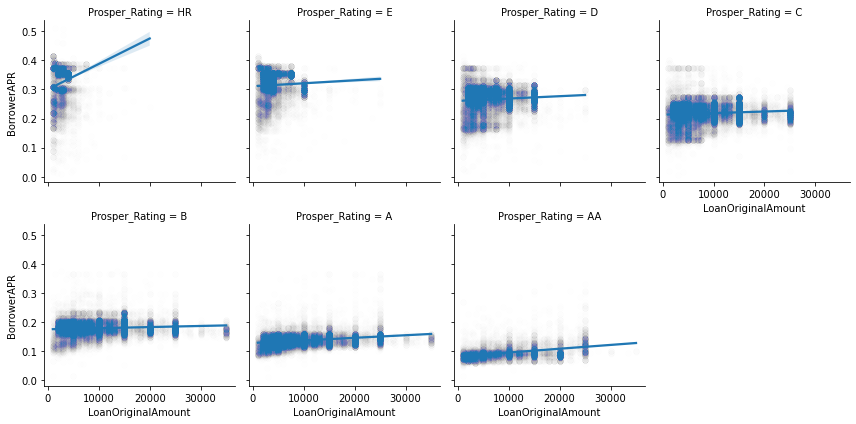

In [37]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

g = sns.FacetGrid(data = sub_loans, col = 'Prosper_Rating', col_wrap = 4)
g.map(sns.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.05, scatter_kws = {'alpha': 0.005});

Other Source: https://stackoverflow.com/questions/51195372/python-seaborn-facetgrid

As the APR declines, the risk rating improves with significant increase in loan amount. Interestingly, when the Prosper grades are raised from HR to A or above, the link between borrower APR and loan amount shifts from negative to slightly positive. This might be because persons with A or AA credit scores prefer to borrow more money; increasing the APR could deter them from borrowing even more, maximizing the profit. People with poorer credit scores tend to borrow less money, therefore lowering the APR may encourage them to borrow more.

#### How does Employment Status alter the relation between BorrowerAPR and Loan Amount?

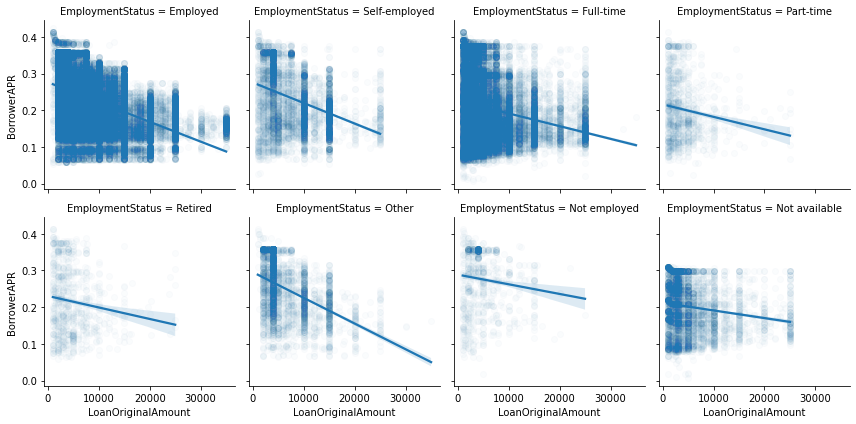

In [38]:
g = sns.FacetGrid(data = sub_loans, col = 'EmploymentStatus', col_wrap = 4)
g.map(sns.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.05, scatter_kws = {'alpha': 0.02});

The impact of work status on the link between loan amount and APR does not appear to be significant. The ones who are employed in some way (employed, full-time, self-employed) have a greater, negative association, whereas the others have a mildly negative relationship.

#### How does Loan Term  alter the relation between BorrowerAPR and Loan Amount?

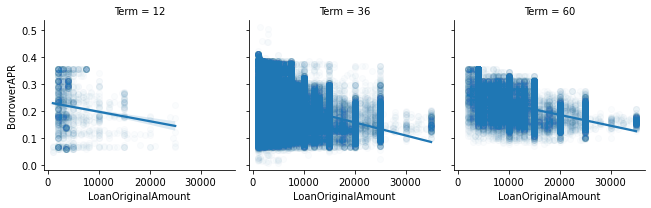

In [39]:
g = sns.FacetGrid(data = sub_loans, col = 'Term', col_wrap = 4)
g.map(sns.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.05, scatter_kws = {'alpha': 0.02});

The loan term appears to have little influence on the link between APR and loan amount.

#### What is the relationship between Loan Term, Listing Category, and Loan Amount?

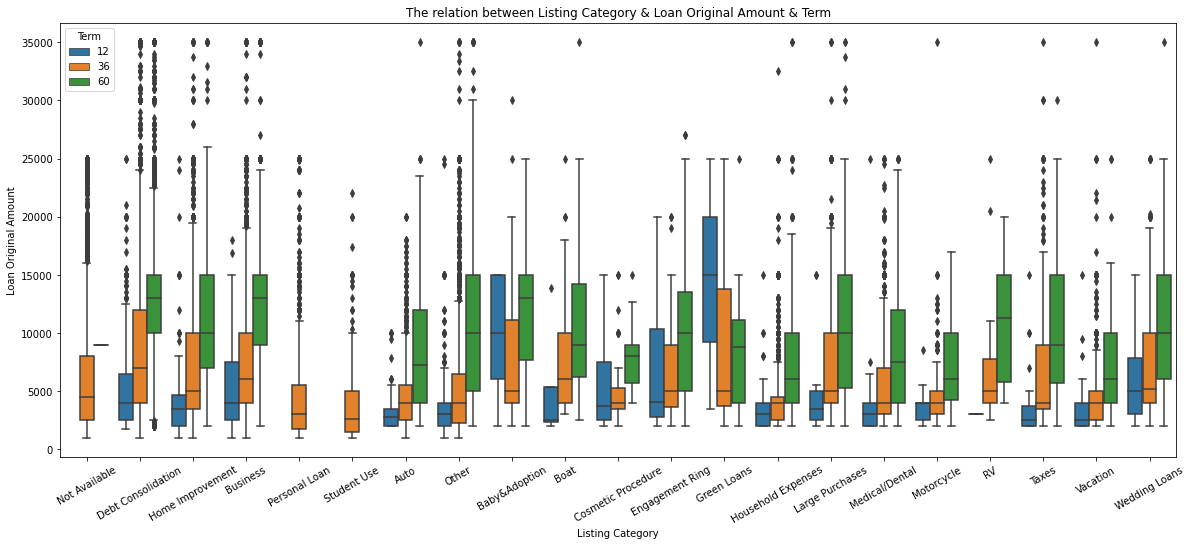

In [40]:
plt.figure(figsize=[20,8])


sns.boxplot(data=sub_loans,x="ListingCategory",y="LoanOriginalAmount",hue="Term");
plt.xlabel("Listing Category");
plt.ylabel("Loan Original Amount");
plt.title("The relation between Listing Category & Loan Original Amount & Term");
plt.xticks(rotation =30);

#### What is the relationship between Prosper Rating, BorrowerAPR, and Term?

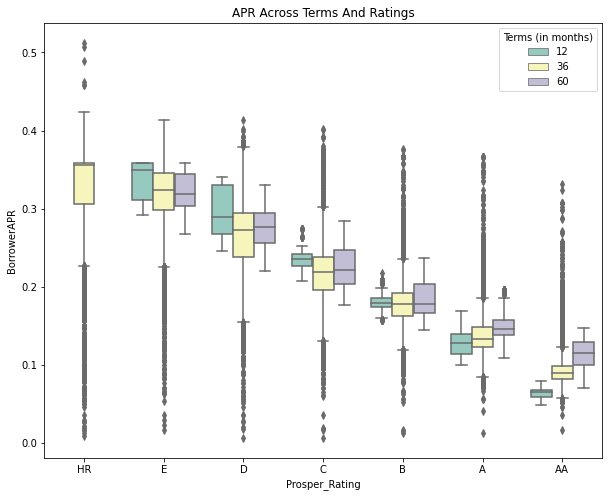

In [41]:
fig = plt.figure(figsize = [10, 8])
ax = sns.boxplot(x='Prosper_Rating', y='BorrowerAPR', hue='Term',
                 data=sub_loans, palette="Set3")
plt.title('APR Across Terms And Ratings')
plt.legend(title = 'Terms (in months)');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The APR drops as the risk rating increases for each individual term across all risk ratings. When the period is extended, the APR often falls. When the rating reaches B or above, the longer the period, the greater the APR for each individual level. This form of loan appears to be more tailored or designed for the specific borrower.


>Moreover, i discovered that work status had an influence on the correlation between the initial loan amount and APR. However, it does not appear to be very large. The ones who are employed in some way (employed, full-time, self-employed) have a greater, negative association, whereas the others have a mildly negative relationship. Finally, we discovered that duration had no influence on the relationship between loan amount and APR.

### Were there any interesting or surprising interactions between features?

> When investigating the influence of prosper ratings on the link between loan amount and APR, one striking conclusion is the progressive shift from a negative to a positive association. There is a negative link between rating HR and B. It becomes more optimistic as we progress. Another intriguing observation is that APR decreases with increasing term for those with ratings HR-C, but increases with increasing term for those with ratings B-AA.

## Conclusions
> From the above visualizations created, from the univariate exploration to the multivariate exploration, many variables were found to be negatively correlated to BorrowerAPR, whereas ProsperScore gives the strongest negative relationship.

> Generally, majority Lenders had incomes ranging from 25,000 to 49,999, putting them in the 12% and a portion of the 22% single population U.S. tax bracket, respectively, for 2019. (Source: https://taxfoundation.org/2019-tax-brackets/)




In [42]:
# Lastly, i would save the dataset used for the exploration analysis in a csv format

sub_loans.to_csv('loan_dataset.csv', index=False)